**Project to predict diabetes_mellitus**

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/WiDS/train.csv',index_col=0,header=0)
df.head()
X=df.drop(columns='diabetes_mellitus')
y=df['diabetes_mellitus']

Check if Dataset is balanced or not

In [3]:
y.value_counts()

0    101853
1     28104
Name: diabetes_mellitus, dtype: int64

Split data into train and test

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Handling imbalanced classes

In [6]:
#from sklearn.ensemble import RandomForestClassifier
#rf_clf = RandomForestClassifier(random_state=42,n_jobs=-1,class_weight="balanced",)
#rf_clf.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42,n_jobs=-1,class_weight="balanced")
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

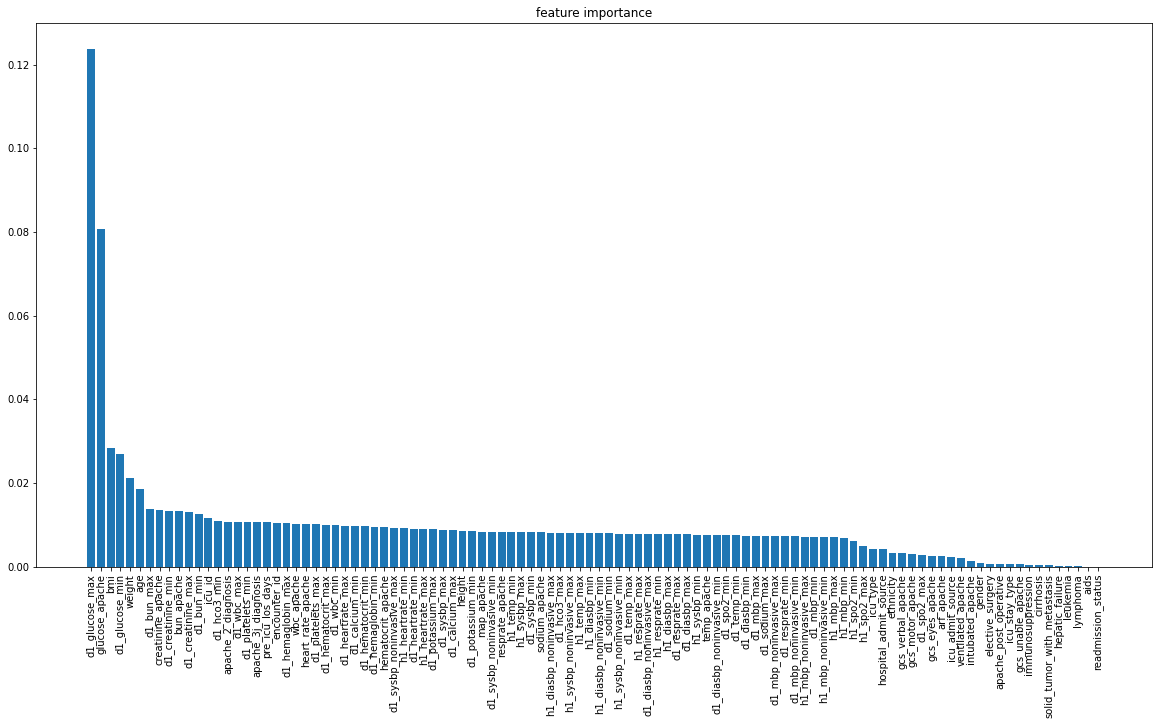

In [7]:
import numpy as np
import matplotlib.pyplot as plt
importances=rf_clf.feature_importances_
#print("rf_clf.feature_importances_: {}".format(importances))
indices = np.argsort(importances)[::-1]
names = [list(X.columns)[i] for i in indices]
plt.figure(figsize=(20,10))
plt.title("feature importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()


Extract top 10 features having maximum contribution

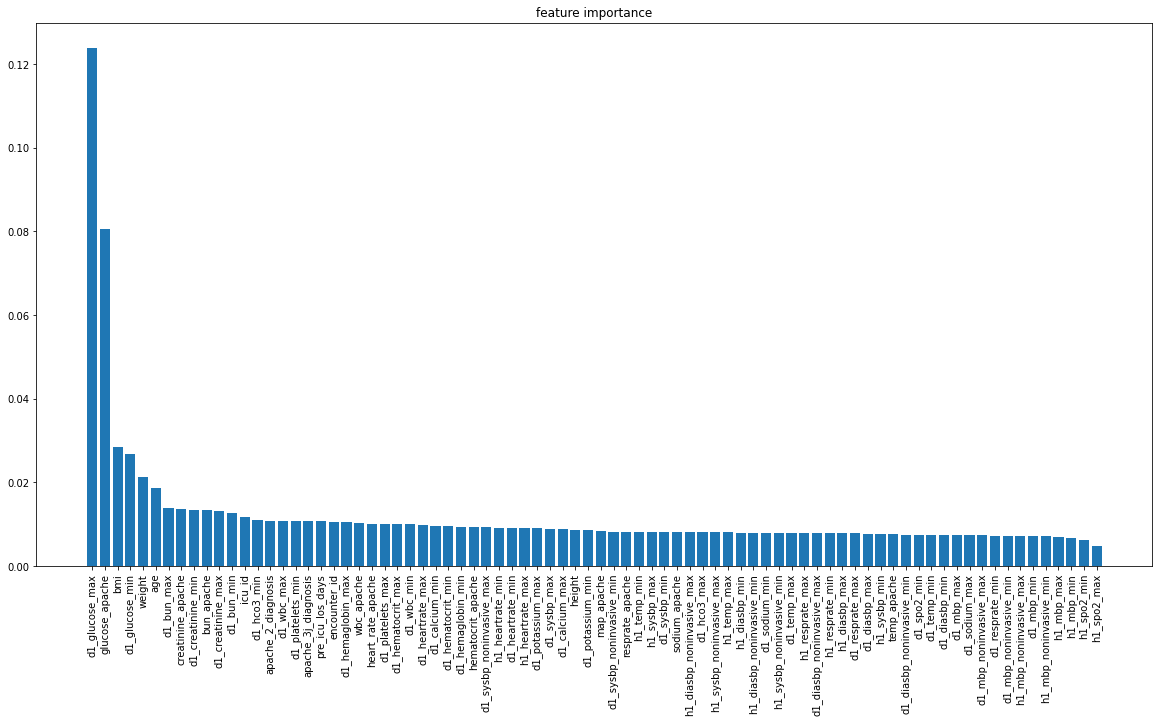

In [9]:
import numpy as np
import matplotlib.pyplot as plt
importances=rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [list(X.columns)[i] for i in indices[0:80]]
index=[importances[i] for i in indices[0:80]]
plt.figure(figsize=(20,10))
plt.title("feature importance")
plt.bar(range(0,80), np.array(index))
plt.xticks(range(0,80), names, rotation=90)
plt.show()

Modify and select only top 10 contributing features

In [10]:
#X_train_modified=X_train[names]
#X_test_modified=X_test[names]
X_train_modified=X[names]
X_train_modified.columns

Index(['d1_glucose_max', 'glucose_apache', 'bmi', 'd1_glucose_min', 'weight',
       'age', 'd1_bun_max', 'creatinine_apache', 'd1_creatinine_min',
       'bun_apache', 'd1_creatinine_max', 'd1_bun_min', 'icu_id',
       'd1_hco3_min', 'apache_2_diagnosis', 'd1_wbc_max', 'd1_platelets_min',
       'apache_3j_diagnosis', 'pre_icu_los_days', 'encounter_id',
       'd1_hemaglobin_max', 'wbc_apache', 'heart_rate_apache',
       'd1_platelets_max', 'd1_hematocrit_max', 'd1_wbc_min',
       'd1_heartrate_max', 'd1_calcium_min', 'd1_hematocrit_min',
       'd1_hemaglobin_min', 'hematocrit_apache', 'd1_sysbp_noninvasive_max',
       'h1_heartrate_min', 'd1_heartrate_min', 'h1_heartrate_max',
       'd1_potassium_max', 'd1_sysbp_max', 'd1_calcium_max', 'height',
       'd1_potassium_min', 'map_apache', 'd1_sysbp_noninvasive_min',
       'resprate_apache', 'h1_temp_min', 'h1_sysbp_max', 'd1_sysbp_min',
       'sodium_apache', 'h1_diasbp_noninvasive_max', 'd1_hco3_max',
       'h1_sysbp_noninvasi

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(random_state=0,n_estimators=50)
model = adaboost.fit(X_train_modified, y_train)
y_pred=model.predict(X_test_modified)
model.score(X_test_modified,y_test)

0.8043757053452344

In [ ]:
n_correct = sum(y_pred == y_test)
print("{0:.4f}".format(n_correct / len(y_pred)))

0.8044


Model selection and Hyperparameter tuning

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:

# create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# create dictionary with candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [xgb.XGBClassifier()],
                 'classifier__max_depth': [1,2,3,4,5],
                 'classifier__n_estimators': [50,100,500,1000,2000,5000,10000],
                 'classifier__learning_rate': [0.01,0.1,1]}]

# create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=3, verbose=1,n_jobs=-1)

# fit grid search
best_model = gridsearch.fit(X_train_modified, y_train)

# view best model
print(best_model.best_estimator_.get_params()['classifier'])

Fitting 3 folds for each of 105 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 223.3min
[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed: 394.1min finished


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=5000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Compare two short listed model

In [11]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train_modified, y, test_size=0.3, random_state=42)
sKFold=StratifiedKFold(3)
xgb_cf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
param_grid={'max_depth':[2]}
grid=GridSearchCV(xgb_cf,param_grid,cv=sKFold, verbose=1,n_jobs=-1,scoring="accuracy")
grid.fit(X_train,y_train)
print("Cross Validation (Accuracy) score:{:.3f}".format(grid.best_score_))
print("Test set (Accuracy) score:{:.3f}".format(grid.score(X_test,y_test)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  4.6min finished


Cross Validation (Accuracy) score:0.834
Test set (Accuracy) score:0.836


In [4]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sKFold=StratifiedKFold(3)
xgb_cf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=5000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
param_grid={'max_depth':[2]}
grid=GridSearchCV(xgb_cf,param_grid,cv=sKFold, verbose=1,n_jobs=-1,scoring="roc_auc")
best_model=grid.fit(X_train,y_train)
print(best_model.get_params())
print("Cross Validation (Accuracy) score:{:.3f}".format(grid.best_score_))
print("Test set (Accuracy) score:{:.3f}".format(grid.score(X_test,y_test)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [26]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_modified, y, test_size=0.3, random_state=42)
xgb_cf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [28]:
model=xgb_cf.fit(X_train,y_train)

KeyError: ignored

In [44]:
y_pred=model.predict(X_test)

In [53]:
n_correct = sum(y_pred == y_test)
print("{0:.4f}".format(n_correct / len(y_pred)))

0.8113


In [52]:
y_test.values[17]

0

In [6]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sKFold=StratifiedKFold(10)
xgb_cf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
roc_auc=cross_val_score(xgb_cf,X_train,y_train,cv=sKFold,scoring="roc_auc",n_jobs=-1)
print(roc_auc)


[0.86079599 0.85101925 0.85286524 0.86272211 0.85689762 0.85590285
 0.85771695 0.85657812 0.86710392 0.85942043]


In [19]:
print(model.score(X_test,y_test))

0.8357699805068226
